## Projet 11 

**La poule qui chante 🐔**

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Alimentaire contient tout le necessaire sur les disponibilité des pays


Population contient la population des pay

RNB = Revenu National Brut = GNI (Gross National Income)s



In [71]:
alimentaire=pd.read_csv(r"C:\Users\aylin\Downloads\DAN-P11-data\DAN-P11-data\DisponibiliteAlimentaire_2017.csv")
pop=pd.read_csv(r"C:\Users\aylin\Downloads\DAN-P11-data\DAN-P11-data\Population_2000_2018.csv")
#Recupérer sur le site de la FAO
rnb_2017=pd.read_csv(r"C:\Users\aylin\Downloads\DAN-P11-data\DAN-P11-data\FAO_RNB_par_habitant_2017.csv")

## Alimentaire


In [73]:
alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176600 entries, 0 to 176599
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Code Domaine            176600 non-null  object 
 1   Domaine                 176600 non-null  object 
 2   Code zone               176600 non-null  int64  
 3   Zone                    176600 non-null  object 
 4   Code Élément            176600 non-null  int64  
 5   Élément                 176600 non-null  object 
 6   Code Produit            176600 non-null  int64  
 7   Produit                 176600 non-null  object 
 8   Code année              176600 non-null  int64  
 9   Année                   176600 non-null  int64  
 10  Unité                   176600 non-null  object 
 11  Valeur                  176600 non-null  float64
 12  Symbole                 176600 non-null  object 
 13  Description du Symbole  176600 non-null  object 
dtypes: float64(1), int64

In [75]:
alimentaire.describe(include='all')

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
count,176600,176600,176600.000000,176600,176600.000000,176600,176600.000000,176600,176600.0,176600.0,176600,176600.000000,176600,176600
unique,1,1,NaN,174,NaN,17,NaN,98,NaN,NaN,4,NaN,2,2
top,FBS,Nouveaux Bilans Alimentaire,NaN,Tchad,NaN,Disponibilité intérieure,NaN,Maïs et produits,NaN,NaN,Milliers de tonnes,NaN,S,Données standardisées
freq,176600,176600,NaN,1416,NaN,15905,NaN,2593,NaN,NaN,118487,NaN,118487,118487
mean,NaN,NaN,125.474740,NaN,3810.052894,NaN,2628.778545,NaN,2017.0,2017.0,NaN,210.554918,NaN,NaN
std,NaN,NaN,72.941699,NaN,2211.790089,NaN,91.993247,NaN,0.0,0.0,NaN,4762.047787,NaN,NaN
min,NaN,NaN,1.000000,NaN,645.000000,NaN,2511.000000,NaN,2017.0,2017.0,NaN,-10388.000000,NaN,NaN
25%,NaN,NaN,63.000000,NaN,684.000000,NaN,2556.000000,NaN,2017.0,2017.0,NaN,0.000000,NaN,NaN
50%,NaN,NaN,120.000000,NaN,5142.000000,NaN,2612.000000,NaN,2017.0,2017.0,NaN,0.120000,NaN,NaN
75%,NaN,NaN,188.000000,NaN,5301.000000,NaN,2732.000000,NaN,2017.0,2017.0,NaN,8.462500,NaN,NaN


In [77]:
alimentaire.nunique()

Code Domaine                 1
Domaine                      1
Code zone                  174
Zone                       174
Code Élément                17
Élément                     17
Code Produit                98
Produit                     98
Code année                   1
Année                        1
Unité                        4
Valeur                    7250
Symbole                      2
Description du Symbole       2
dtype: int64

In [79]:
def doublons(df):
    print(len(df) - len(df.drop_duplicates()), 'doublons parfait')

doublons(alimentaire)

0 doublons parfait


In [81]:
alimentaire.head(10)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées
5,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5521,Aliments pour animaux,2511,Blé et produits,2017,2017,Milliers de tonnes,76.0,S,Données standardisées
6,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5527,Semences,2511,Blé et produits,2017,2017,Milliers de tonnes,344.0,S,Données standardisées
7,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5123,Pertes,2511,Blé et produits,2017,2017,Milliers de tonnes,642.0,S,Données standardisées
8,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5170,Résidus,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
9,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5142,Nourriture,2511,Blé et produits,2017,2017,Milliers de tonnes,5640.0,S,Données standardisées


## Population


In [83]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            4411 non-null   object 
 1   Domaine                 4411 non-null   object 
 2   Code zone               4411 non-null   int64  
 3   Zone                    4411 non-null   object 
 4   Code Élément            4411 non-null   int64  
 5   Élément                 4411 non-null   object 
 6   Code Produit            4411 non-null   int64  
 7   Produit                 4411 non-null   object 
 8   Code année              4411 non-null   int64  
 9   Année                   4411 non-null   int64  
 10  Unité                   4411 non-null   object 
 11  Valeur                  4411 non-null   float64
 12  Symbole                 4411 non-null   object 
 13  Description du Symbole  4411 non-null   object 
 14  Note                    258 non-null    

In [85]:
pop.describe(include='all')

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
count,4411,4411,4411.000000,4411,4411.0,4411,4411.0,4411,4411.000000,4411.000000,4411,4.411000e+03,4411,4411,258
unique,1,1,NaN,238,NaN,1,NaN,1,NaN,NaN,1,NaN,2,2,1
top,OA,Séries temporelles annuelles,NaN,Afghanistan,NaN,Population totale,NaN,Population-Estimations,NaN,NaN,1000 personnes,NaN,X,Sources internationales sûres,"UNDESA, Population Division – World Population..."
freq,4411,4411,NaN,19,NaN,4411,NaN,4411,NaN,NaN,4411,NaN,4374,4374,258
mean,NaN,NaN,132.202902,NaN,511.0,NaN,3010.0,NaN,2009.068238,2009.068238,NaN,2.963004e+04,NaN,NaN,NaN
std,NaN,NaN,75.854840,NaN,0.0,NaN,0.0,NaN,5.481539,5.481539,NaN,1.238029e+05,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,511.0,NaN,3010.0,NaN,2000.000000,2000.000000,NaN,7.850000e-01,NaN,NaN,NaN
25%,NaN,NaN,68.000000,NaN,511.0,NaN,3010.0,NaN,2004.000000,2004.000000,NaN,3.921890e+02,NaN,NaN,NaN
50%,NaN,NaN,132.000000,NaN,511.0,NaN,3010.0,NaN,2009.000000,2009.000000,NaN,4.764741e+03,NaN,NaN,NaN
75%,NaN,NaN,195.000000,NaN,511.0,NaN,3010.0,NaN,2014.000000,2014.000000,NaN,1.821548e+04,NaN,NaN,NaN


In [87]:
def doublons(df):
    print(len(df) - len(df.drop_duplicates()), 'doublons parfait')

doublons(pop)

0 doublons parfait


In [89]:
pop.head(10)


,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN
5,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2005,2005,1000 personnes,25654.277,X,Sources internationales sûres,NaN
6,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2006,2006,1000 personnes,26433.049,X,Sources internationales sûres,NaN
7,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2007,2007,1000 personnes,27100.536,X,Sources internationales sûres,NaN
8,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2008,2008,1000 personnes,27722.276,X,Sources internationales sûres,NaN
9,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2009,2009,1000 personnes,28394.813,X,Sources internationales sûres,NaN


In [91]:
pop.nunique()


Code Domaine                 1
Domaine                      1
Code zone                  238
Zone                       238
Code Élément                 1
Élément                      1
Code Produit                 1
Produit                      1
Code année                  19
Année                       19
Unité                        1
Valeur                    4398
Symbole                      2
Description du Symbole       2
Note                         1
dtype: int64

**multiplions la population par 1000 puisque celle-ci est par mille habitants pour retomber sur les valeurs standards**

In [93]:
pop['population']=pop['Valeur']*1000

In [95]:
pop_2017=pop.loc[pop['Année']==2017]

In [99]:
pop_2017=pd.pivot_table(pop_2017, index ='Zone', values= "population", aggfunc= sum)
pop_2017.reset_index()

C:\Users\aylin\AppData\Local\Temp\ipykernel_10824\2082497235.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pop_2017=pd.pivot_table(pop_2017, index ='Zone', values= "population", aggfunc= sum)


,Zone,population
0,Afghanistan,36296113.0
1,Afrique du Sud,57009756.0
2,Albanie,2884169.0
3,Algérie,41389189.0
4,Allemagne,82658409.0
...,...,...
231,Îles Salomon,636039.0
232,Îles Turques-et-Caïques,37115.0
233,Îles Vierges américaines,104751.0
234,Îles Vierges britanniques,29577.0


## Revenue annuel brut

Changement de noms du pays-bas pour convenir au nom du pays-bas du df principal



In [101]:
rnb_2017['Zone']= rnb_2017['Zone'].replace(['Pays-Bas (Royaume des)'],['Pays-Bas'])


In [103]:
rnb_2017.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            210 non-null    object 
 1   Domaine                 210 non-null    object 
 2   Code zone (M49)         210 non-null    int64  
 3   Zone                    210 non-null    object 
 4   Code Élément            210 non-null    int64  
 5   Élément                 210 non-null    object 
 6   Code Produit            210 non-null    int64  
 7   Produit                 210 non-null    object 
 8   Code année              210 non-null    int64  
 9   Année                   210 non-null    int64  
 10  Unité                   210 non-null    object 
 11  Valeur                  210 non-null    float64
 12  Symbole                 210 non-null    object 
 13  Description du Symbole  210 non-null    object 
 14  Note                    0 non-null      fl

In [105]:
rnb_2017.describe(include='all')


,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
count,210,210,210.000000,210,210.0,210,210.0,210,210.0,210.0,210,210.000000,210,210,0.0
unique,1,1,NaN,210,NaN,1,NaN,1,NaN,NaN,1,NaN,1,1,NaN
top,MK,Indicateurs macro,NaN,Afghanistan,NaN,Valeur US$ par habitant,NaN,Revenu national brut,NaN,NaN,USD,NaN,X,Chiffre de source externe,NaN
freq,210,210,NaN,1,NaN,210,NaN,210,NaN,NaN,210,NaN,210,210,NaN
mean,NaN,NaN,430.695238,NaN,6119.0,NaN,22011.0,NaN,2017.0,2017.0,NaN,16440.070851,NaN,NaN,NaN
std,NaN,NaN,251.139418,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,24749.109664,NaN,NaN,NaN
min,NaN,NaN,4.000000,NaN,6119.0,NaN,22011.0,NaN,2017.0,2017.0,NaN,286.754152,NaN,NaN,NaN
25%,NaN,NaN,212.500000,NaN,6119.0,NaN,22011.0,NaN,2017.0,2017.0,NaN,2009.325735,NaN,NaN,NaN
50%,NaN,NaN,432.000000,NaN,6119.0,NaN,22011.0,NaN,2017.0,2017.0,NaN,6247.200641,NaN,NaN,NaN
75%,NaN,NaN,642.750000,NaN,6119.0,NaN,22011.0,NaN,2017.0,2017.0,NaN,20126.259328,NaN,NaN,NaN


In [107]:
def doublons(df):
    print(len(df) - len(df.drop_duplicates()), 'doublons parfait')

doublons(rnb_2017)

0 doublons parfait


In [109]:
rnb_2017.nunique()


Code Domaine                1
Domaine                     1
Code zone (M49)           210
Zone                      210
Code Élément                1
Élément                     1
Code Produit                1
Produit                     1
Code année                  1
Année                       1
Unité                       1
Valeur                    210
Symbole                     1
Description du Symbole      1
Note                        0
dtype: int64

In [111]:
rnb_2017.head()


,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,MK,Indicateurs macro,4,Afghanistan,6119,Valeur US$ par habitant,22011,Revenu national brut,2017,2017,USD,539.263388,X,Chiffre de source externe,NaN
1,MK,Indicateurs macro,710,Afrique du Sud,6119,Valeur US$ par habitant,22011,Revenu national brut,2017,2017,USD,6429.574062,X,Chiffre de source externe,NaN
2,MK,Indicateurs macro,8,Albanie,6119,Valeur US$ par habitant,22011,Revenu national brut,2017,2017,USD,4503.239709,X,Chiffre de source externe,NaN
3,MK,Indicateurs macro,12,Algérie,6119,Valeur US$ par habitant,22011,Revenu national brut,2017,2017,USD,4027.655361,X,Chiffre de source externe,NaN
4,MK,Indicateurs macro,276,Allemagne,6119,Valeur US$ par habitant,22011,Revenu national brut,2017,2017,USD,45470.601480,X,Chiffre de source externe,NaN


In [113]:
rnb_2017=rnb_2017[['Zone','Valeur']]
rnb_2017 = rnb_2017.rename(columns = {'Valeur': 'rnb_hab'})

In [115]:
rnb_2017


,Zone,rnb_hab
0,Afghanistan,539.263388
1,Afrique du Sud,6429.574062
2,Albanie,4503.239709
3,Algérie,4027.655361
4,Allemagne,45470.601480
...,...,...
205,Venezuela (République bolivarienne du),7676.686180
206,Viet Nam,2777.521568
207,Yémen,552.732233
208,Zambie,1438.770605


## Création d'un nouveau dataframe pour chaque pays

on vas garder que le necessaire des données



In [123]:
list_dispo =['Disponibilité intérieure','Disponibilité alimentaire (Kcal/personne/jour)','Disponibilité alimentaire en quantité (kg/personne/an)'
             ,'Disponibilité de protéines en quantité (g/personne/jour)', 'Importations - Quantité',
             'Exportations - Quantité','Production']
dispo_2017= pd.pivot_table(alimentaire[alimentaire['Élément'].isin(list_dispo)],
                                                      index ='Zone', values= "Valeur", aggfunc= 'sum', columns=['Élément'])
dispo_2017.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174 entries, Afghanistan to Îles Salomon
Data columns (total 7 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Disponibilité alimentaire (Kcal/personne/jour)            172 non-null    float64
 1   Disponibilité alimentaire en quantité (kg/personne/an)    172 non-null    float64
 2   Disponibilité de protéines en quantité (g/personne/jour)  172 non-null    float64
 3   Disponibilité intérieure                                  174 non-null    float64
 4   Exportations - Quantité                                   174 non-null    float64
 5   Importations - Quantité                                   174 non-null    float64
 6   Production                                                174 non-null    float64
dtypes: float64(7)
memory usage: 10.9+ KB


In [125]:
dispo_2017.loc[dispo_2017['Disponibilité alimentaire (Kcal/personne/jour)'].isnull()== True]

Élément,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production
Zone,,,,,,,
Bermudes,NaN,NaN,NaN,4.0,0.0,3.0,0.0
Brunéi Darussalam,NaN,NaN,NaN,28.0,2.0,16.0,13.0


Les bermudes et le brunéi darussalam n'ont pas de valeurs, nous pouvons les mettre de côté plus tard si nécessaire



In [129]:
dispo_2017.describe(include='all')

Élément,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production
count,172.000000,172.000000,172.000000,1.740000e+02,174.000000,174.000000,1.740000e+02
mean,2858.395349,692.573081,81.192907,6.349196e+04,9135.994253,8500.879310,6.475456e+04
std,454.544301,200.704764,20.199063,2.237781e+05,23804.832707,19815.935449,2.236311e+05
min,1754.000000,302.470000,39.910000,4.000000e+00,0.000000,1.000000,0.000000e+00
25%,2514.250000,537.755000,64.212500,2.703750e+03,160.250000,675.000000,1.979500e+03
50%,2871.500000,677.455000,81.390000,1.185200e+04,840.000000,2587.000000,1.066450e+04
75%,3250.250000,882.612500,96.445000,3.258300e+04,7056.000000,7517.250000,3.176325e+04
max,3770.000000,1260.490000,141.340000,2.303613e+06,207278.000000,205903.000000,2.147703e+06


In [131]:
dispo_2017


Élément,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production
Zone,,,,,,,
Afghanistan,1997.0,357.31,54.09,15139.0,601.0,4555.0,11609.0
Afrique du Sud,2987.0,556.42,83.36,66840.0,10968.0,9020.0,68455.0
Albanie,3400.0,1260.49,119.50,4879.0,156.0,884.0,4231.0
Algérie,3345.0,798.71,92.85,45365.0,743.0,19718.0,26763.0
Allemagne,3559.0,943.24,104.07,174960.0,58793.0,66550.0,167828.0
...,...,...,...,...,...,...,...
Émirats arabes unis,3370.0,627.67,107.26,11795.0,4914.0,14986.0,1793.0
Équateur,2585.0,563.62,65.77,23810.0,8897.0,2134.0,30843.0
États-Unis d'Amérique,3762.0,990.38,113.61,849821.0,207278.0,84507.0,974034.0


Création d'une colonne pour avoir le ratio de nos proteine animal par la dispo alimentaire (kg/an) et cela en %



In [134]:
prot_animal=['Viande de Volailles','Viande de Bovins',
            "Viande d'Ovins/Caprins", 'Viande de Suides',
            'Viande de Volailles', 'Viande, Autre', 'Abats Comestible',
            'Beurre, Ghee', 'Crème', 'Graisses Animales Crue', 'Oeufs',
            'Lait - Excl Beurre', 'Poissons Eau Douce', 'Miscellanees','Perciform',
            'Poissons Pelagiques', 'Poissons Marins, Autres', 'Crustacés',
            'Cephalopodes', 'Mollusques, Autres', 'Animaux Aquatiques Autre','Viande de Anim Aquatiq']
list_prot_animal=alimentaire.loc[alimentaire['Produit'].isin(prot_animal)]


In [136]:
dispo_animal=pd.pivot_table(list_prot_animal[list_prot_animal['Élément'].isin(list_dispo)],
                index ='Zone', values= "Valeur", aggfunc= 'sum', columns=['Élément'])
dispo_animal

Élément,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production
Zone,,,,,,,
Afghanistan,190.0,67.84,10.57,2722.0,0.0,185.0,2538.0
Afrique du Sud,454.0,131.80,34.56,8166.0,1396.0,1317.0,8238.0
Albanie,1097.0,475.90,66.41,1420.0,10.0,118.0,1326.0
Algérie,405.0,156.12,25.77,6692.0,7.0,2213.0,4486.0
Allemagne,1092.0,393.36,63.08,37437.0,24619.0,17429.0,44689.0
...,...,...,...,...,...,...,...
Émirats arabes unis,610.0,144.03,44.23,1682.0,495.0,1717.0,478.0
Équateur,506.0,174.33,29.98,3224.0,1118.0,175.0,4104.0
États-Unis d'Amérique,1022.0,420.67,73.88,146295.0,25185.0,10788.0,161750.0


In [138]:
dispo_animal['ratio proteine animal']= round((dispo_animal['Disponibilité de protéines en quantité (g/personne/jour)']/1000*365)/dispo_2017['Disponibilité alimentaire en quantité (kg/personne/an)']*100,2)
dispo_animal

Élément,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,ratio proteine animal
Zone,,,,,,,,
Afghanistan,190.0,67.84,10.57,2722.0,0.0,185.0,2538.0,1.08
Afrique du Sud,454.0,131.80,34.56,8166.0,1396.0,1317.0,8238.0,2.27
Albanie,1097.0,475.90,66.41,1420.0,10.0,118.0,1326.0,1.92
Algérie,405.0,156.12,25.77,6692.0,7.0,2213.0,4486.0,1.18
Allemagne,1092.0,393.36,63.08,37437.0,24619.0,17429.0,44689.0,2.44
...,...,...,...,...,...,...,...,...
Émirats arabes unis,610.0,144.03,44.23,1682.0,495.0,1717.0,478.0,2.57
Équateur,506.0,174.33,29.98,3224.0,1118.0,175.0,4104.0,1.94
États-Unis d'Amérique,1022.0,420.67,73.88,146295.0,25185.0,10788.0,161750.0,2.72


Nous avons maintenant notre dataframe par pays et dont le ratio prot animal/dispo est établie, il reste à effectuer la même chose pour la viande de volaille

In [141]:
list_volaille=alimentaire.loc[alimentaire['Produit']=='Viande de Volailles']
dispo_volaille=pd.pivot_table(list_volaille[list_volaille['Élément'].isin(list_dispo)],
                index ='Zone', values= "Valeur", aggfunc= 'sum', columns=['Élément'])
dispo_volaille

Élément,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production
Zone,,,,,,,
Afghanistan,5.0,1.53,0.54,57.0,NaN,29.0,28.0
Afrique du Sud,143.0,35.69,14.11,2118.0,63.0,514.0,1667.0
Albanie,85.0,16.36,6.26,47.0,0.0,38.0,13.0
Algérie,22.0,6.38,1.97,277.0,0.0,2.0,275.0
Allemagne,71.0,19.47,7.96,1739.0,646.0,842.0,1514.0
...,...,...,...,...,...,...,...
Émirats arabes unis,147.0,43.47,14.80,412.0,94.0,433.0,48.0
Équateur,83.0,19.31,6.15,341.0,0.0,0.0,340.0
États-Unis d'Amérique,219.0,55.68,19.93,18266.0,3692.0,123.0,21914.0


In [143]:
dispo_volaille.info()

<class 'pandas.core.frame.DataFrame'>
Index: 172 entries, Afghanistan to Îles Salomon
Data columns (total 7 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Disponibilité alimentaire (Kcal/personne/jour)            172 non-null    float64
 1   Disponibilité alimentaire en quantité (kg/personne/an)    172 non-null    float64
 2   Disponibilité de protéines en quantité (g/personne/jour)  172 non-null    float64
 3   Disponibilité intérieure                                  170 non-null    float64
 4   Exportations - Quantité                                   135 non-null    float64
 5   Importations - Quantité                                   170 non-null    float64
 6   Production                                                168 non-null    float64
dtypes: float64(7)
memory usage: 10.8+ KB


In [145]:
dispo_volaille.loc[dispo_volaille['Disponibilité intérieure'].isnull()== True]


Élément,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production
Zone,,,,,,,
Ouzbékistan,6.0,1.96,0.63,NaN,NaN,NaN,NaN
République démocratique populaire lao,41.0,10.91,3.59,NaN,NaN,NaN,NaN


Nous avons deux pays qui n'ont pas de valeurs

L'Ouzbékistan et le lao n'ont pas de valeur pour la dispo intérieur et l'importation. Nous les supprimerons ci necessaire



In [149]:
#Création d'un ratio de proteine de volaille / disponibilité en protéine
dispo_volaille['Ratio protéine volaille/protéines animal']= round(dispo_volaille['Disponibilité de protéines en quantité (g/personne/jour)']/dispo_animal['Disponibilité de protéines en quantité (g/personne/jour)']*100,2)
dispo_volaille

Élément,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Ratio protéine volaille/protéines animal
Zone,,,,,,,,
Afghanistan,5.0,1.53,0.54,57.0,NaN,29.0,28.0,5.11
Afrique du Sud,143.0,35.69,14.11,2118.0,63.0,514.0,1667.0,40.83
Albanie,85.0,16.36,6.26,47.0,0.0,38.0,13.0,9.43
Algérie,22.0,6.38,1.97,277.0,0.0,2.0,275.0,7.64
Allemagne,71.0,19.47,7.96,1739.0,646.0,842.0,1514.0,12.62
...,...,...,...,...,...,...,...,...
Émirats arabes unis,147.0,43.47,14.80,412.0,94.0,433.0,48.0,33.46
Équateur,83.0,19.31,6.15,341.0,0.0,0.0,340.0,20.51
États-Unis d'Amérique,219.0,55.68,19.93,18266.0,3692.0,123.0,21914.0,26.98


In [151]:
#Création variable du taux de dependance à l'importation :
#TDI éléver = forte dépendance a l'importation
dispo_volaille['TDI (%)']=round(dispo_volaille['Importations - Quantité']/dispo_volaille['Disponibilité intérieure']*100,2)
#Création variable du taux d'auto-suffisance
dispo_volaille['TAS (%)']=round(dispo_volaille['Production']/dispo_volaille['Disponibilité intérieure']*100,2)


## Merge des dataframes


In [154]:
dispo_2017.drop(['Disponibilité alimentaire en quantité (kg/personne/an)','Disponibilité intérieure','Exportations - Quantité','Importations - Quantité','Production'], axis=1, inplace=True)
dispo_2017

Élément,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour)
Zone,,
Afghanistan,1997.0,54.09
Afrique du Sud,2987.0,83.36
Albanie,3400.0,119.50
Algérie,3345.0,92.85
Allemagne,3559.0,104.07
...,...,...
Émirats arabes unis,3370.0,107.26
Équateur,2585.0,65.77
États-Unis d'Amérique,3762.0,113.61


In [156]:
dispo_animal.drop(['Disponibilité de protéines en quantité (g/personne/jour)','Disponibilité intérieure','Exportations - Quantité','Importations - Quantité','Production','Disponibilité alimentaire en quantité (kg/personne/an)','Disponibilité alimentaire (Kcal/personne/jour)'], axis=1,  inplace=True)
dispo_animal

Élément,ratio proteine animal
Zone,
Afghanistan,1.08
Afrique du Sud,2.27
Albanie,1.92
Algérie,1.18
Allemagne,2.44
...,...
Émirats arabes unis,2.57
Équateur,1.94
États-Unis d'Amérique,2.72


In [158]:
df_prot=pd.merge(dispo_2017,dispo_animal, on='Zone',indicator=True, how="left")
df_prot._merge.value_counts()

_merge
both          174
left_only       0
right_only      0
Name: count, dtype: int64

In [160]:
df_prot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174 entries, Afghanistan to Îles Salomon
Data columns (total 4 columns):
 #   Column                                                    Non-Null Count  Dtype   
---  ------                                                    --------------  -----   
 0   Disponibilité alimentaire (Kcal/personne/jour)            172 non-null    float64 
 1   Disponibilité de protéines en quantité (g/personne/jour)  172 non-null    float64 
 2   ratio proteine animal                                     172 non-null    float64 
 3   _merge                                                    174 non-null    category
dtypes: category(1), float64(3)
memory usage: 5.7+ KB


In [162]:
df_prot.loc[df_prot['Disponibilité alimentaire (Kcal/personne/jour)'].isnull()==True]

Élément,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),ratio proteine animal,_merge
Zone,,,,
Bermudes,NaN,NaN,NaN,both
Brunéi Darussalam,NaN,NaN,NaN,both


In [164]:
df_prot=df_prot.drop('Bermudes')
df_prot=df_prot.drop('Brunéi Darussalam')

In [166]:
df_prot


Élément,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),ratio proteine animal,_merge
Zone,,,,
Afghanistan,1997.0,54.09,1.08,both
Afrique du Sud,2987.0,83.36,2.27,both
Albanie,3400.0,119.50,1.92,both
Algérie,3345.0,92.85,1.18,both
Allemagne,3559.0,104.07,2.44,both
...,...,...,...,...
Émirats arabes unis,3370.0,107.26,2.57,both
Équateur,2585.0,65.77,1.94,both
États-Unis d'Amérique,3762.0,113.61,2.72,both


## data protXvolaille

In [169]:
dff= pd.merge(df_prot, dispo_volaille,indicator='oui', on ='Zone')
dff['oui'].value_counts()

oui
both          172
left_only       0
right_only      0
Name: count, dtype: int64

In [171]:
dff.info()


<class 'pandas.core.frame.DataFrame'>
Index: 172 entries, Afghanistan to Îles Salomon
Data columns (total 15 columns):
 #   Column                                                      Non-Null Count  Dtype   
---  ------                                                      --------------  -----   
 0   Disponibilité alimentaire (Kcal/personne/jour)_x            172 non-null    float64 
 1   Disponibilité de protéines en quantité (g/personne/jour)_x  172 non-null    float64 
 2   ratio proteine animal                                       172 non-null    float64 
 3   _merge                                                      172 non-null    category
 4   Disponibilité alimentaire (Kcal/personne/jour)_y            172 non-null    float64 
 5   Disponibilité alimentaire en quantité (kg/personne/an)      172 non-null    float64 
 6   Disponibilité de protéines en quantité (g/personne/jour)_y  172 non-null    float64 
 7   Disponibilité intérieure                                    170 no

In [173]:
dff.loc[dff['Importations - Quantité'].isnull()==True]


Élément,Disponibilité alimentaire (Kcal/personne/jour)_x,Disponibilité de protéines en quantité (g/personne/jour)_x,ratio proteine animal,_merge,Disponibilité alimentaire (Kcal/personne/jour)_y,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour)_y,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Ratio protéine volaille/protéines animal,TDI (%),TAS (%),oui
Zone,,,,,,,,,,,,,,,
Ouzbékistan,3020.0,93.52,1.48,both,6.0,1.96,0.63,NaN,NaN,NaN,NaN,1.68,NaN,NaN,both
République démocratique populaire lao,3044.0,83.19,0.83,both,41.0,10.91,3.59,NaN,NaN,NaN,NaN,17.70,NaN,NaN,both


Nous voyons ici les deux pays vu précedemment nous pouvons donc les exclure de notre df



In [176]:
dff=dff.drop('République démocratique populaire lao')
dff=dff.drop('Ouzbékistan')

In [178]:
dff.info()


<class 'pandas.core.frame.DataFrame'>
Index: 170 entries, Afghanistan to Îles Salomon
Data columns (total 15 columns):
 #   Column                                                      Non-Null Count  Dtype   
---  ------                                                      --------------  -----   
 0   Disponibilité alimentaire (Kcal/personne/jour)_x            170 non-null    float64 
 1   Disponibilité de protéines en quantité (g/personne/jour)_x  170 non-null    float64 
 2   ratio proteine animal                                       170 non-null    float64 
 3   _merge                                                      170 non-null    category
 4   Disponibilité alimentaire (Kcal/personne/jour)_y            170 non-null    float64 
 5   Disponibilité alimentaire en quantité (kg/personne/an)      170 non-null    float64 
 6   Disponibilité de protéines en quantité (g/personne/jour)_y  170 non-null    float64 
 7   Disponibilité intérieure                                    170 no

In [180]:
dff

Élément,Disponibilité alimentaire (Kcal/personne/jour)_x,Disponibilité de protéines en quantité (g/personne/jour)_x,ratio proteine animal,_merge,Disponibilité alimentaire (Kcal/personne/jour)_y,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour)_y,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Ratio protéine volaille/protéines animal,TDI (%),TAS (%),oui
Zone,,,,,,,,,,,,,,,
Afghanistan,1997.0,54.09,1.08,both,5.0,1.53,0.54,57.0,NaN,29.0,28.0,5.11,50.88,49.12,both
Afrique du Sud,2987.0,83.36,2.27,both,143.0,35.69,14.11,2118.0,63.0,514.0,1667.0,40.83,24.27,78.71,both
Albanie,3400.0,119.50,1.92,both,85.0,16.36,6.26,47.0,0.0,38.0,13.0,9.43,80.85,27.66,both
Algérie,3345.0,92.85,1.18,both,22.0,6.38,1.97,277.0,0.0,2.0,275.0,7.64,0.72,99.28,both
Allemagne,3559.0,104.07,2.44,both,71.0,19.47,7.96,1739.0,646.0,842.0,1514.0,12.62,48.42,87.06,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,3370.0,107.26,2.57,both,147.0,43.47,14.80,412.0,94.0,433.0,48.0,33.46,105.10,11.65,both
Équateur,2585.0,65.77,1.94,both,83.0,19.31,6.15,341.0,0.0,0.0,340.0,20.51,0.00,99.71,both
États-Unis d'Amérique,3762.0,113.61,2.72,both,219.0,55.68,19.93,18266.0,3692.0,123.0,21914.0,26.98,0.67,119.97,both


## DFF X pop

In [185]:
dff= pd.merge(dff, pop_2017,indicator='oui2' ,on ='Zone')
dff['oui2'].value_counts()

oui2
both          170
left_only       0
right_only      0
Name: count, dtype: int64

In [187]:
dff.info()


<class 'pandas.core.frame.DataFrame'>
Index: 170 entries, Afghanistan to Îles Salomon
Data columns (total 17 columns):
 #   Column                                                      Non-Null Count  Dtype   
---  ------                                                      --------------  -----   
 0   Disponibilité alimentaire (Kcal/personne/jour)_x            170 non-null    float64 
 1   Disponibilité de protéines en quantité (g/personne/jour)_x  170 non-null    float64 
 2   ratio proteine animal                                       170 non-null    float64 
 3   _merge                                                      170 non-null    category
 4   Disponibilité alimentaire (Kcal/personne/jour)_y            170 non-null    float64 
 5   Disponibilité alimentaire en quantité (kg/personne/an)      170 non-null    float64 
 6   Disponibilité de protéines en quantité (g/personne/jour)_y  170 non-null    float64 
 7   Disponibilité intérieure                                    170 no

Création d'une colonne d'importation de volaille par habitant en kg pour cela ils nous faut la population



In [190]:
#Multiplions le tout pour passer de millier de tonnes à kg pour plus de lisibilité pour l'importation de volaille

dff['importation volaille/hab(kg/hab)']=dff['Importations - Quantité']/dff['population']*1000000

In [192]:
dff.loc[dff['TAS (%)'].isnull()==True]


,Disponibilité alimentaire (Kcal/personne/jour)_x,Disponibilité de protéines en quantité (g/personne/jour)_x,ratio proteine animal,_merge,Disponibilité alimentaire (Kcal/personne/jour)_y,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour)_y,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Ratio protéine volaille/protéines animal,TDI (%),TAS (%),oui,population,oui2,importation volaille/hab(kg/hab)
Zone,,,,,,,,,,,,,,,,,,
Djibouti,2677.0,66.43,1.11,both,9.0,2.68,0.92,3.0,NaN,3.0,NaN,6.99,100.0,NaN,both,944099.0,both,3.177633
Maldives,2253.0,81.63,3.56,both,47.0,13.50,4.70,12.0,NaN,12.0,NaN,9.38,100.0,NaN,both,496402.0,both,24.173956


In [194]:
dff = dff.drop('Djibouti')
dff= dff.drop('Maldives')

In [196]:
dff = pd.merge(dff, rnb_2017 , on = 'Zone',indicator='oui3', how="left")
dff['oui3'].value_counts()

oui3
both          166
left_only       2
right_only      0
Name: count, dtype: int64

In [198]:
dff.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 21 columns):
 #   Column                                                      Non-Null Count  Dtype   
---  ------                                                      --------------  -----   
 0   Zone                                                        168 non-null    object  
 1   Disponibilité alimentaire (Kcal/personne/jour)_x            168 non-null    float64 
 2   Disponibilité de protéines en quantité (g/personne/jour)_x  168 non-null    float64 
 3   ratio proteine animal                                       168 non-null    float64 
 4   _merge                                                      168 non-null    category
 5   Disponibilité alimentaire (Kcal/personne/jour)_y            168 non-null    float64 
 6   Disponibilité alimentaire en quantité (kg/personne/an)      168 non-null    float64 
 7   Disponibilité de protéines en quantité (g/personne/jour)_y  168 non-null    floa

In [200]:
dff.loc[dff['rnb_hab'].isnull()==True]


,Zone,Disponibilité alimentaire (Kcal/personne/jour)_x,Disponibilité de protéines en quantité (g/personne/jour)_x,ratio proteine animal,_merge,Disponibilité alimentaire (Kcal/personne/jour)_y,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour)_y,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Ratio protéine volaille/protéines animal,TDI (%),TAS (%),oui,population,oui2,importation volaille/hab(kg/hab),rnb_hab,oui3
33,"Chine, Taiwan Province de",2976.0,85.71,2.42,both,126.0,33.17,11.01,785.0,8.0,161.0,652.0,25.89,20.51,83.06,both,23674546.0,both,6.800553,NaN,left_only
153,Turquie,3538.0,101.20,1.39,both,71.0,20.64,6.99,1674.0,429.0,3.0,2192.0,19.55,0.18,130.94,both,81116450.0,both,0.036984,NaN,left_only


Il n'y a pas de valeur pour du revenu annuel brut pour la Taiwan, et la turquienous le supprimons donc



In [203]:
dff.set_index('Zone',inplace=True)


In [207]:
dff = dff.drop(index=['Chine, Taiwan Province de', 'Turquie'], errors='ignore')


In [209]:
dff.info()


<class 'pandas.core.frame.DataFrame'>
Index: 166 entries, Afghanistan to Îles Salomon
Data columns (total 20 columns):
 #   Column                                                      Non-Null Count  Dtype   
---  ------                                                      --------------  -----   
 0   Disponibilité alimentaire (Kcal/personne/jour)_x            166 non-null    float64 
 1   Disponibilité de protéines en quantité (g/personne/jour)_x  166 non-null    float64 
 2   ratio proteine animal                                       166 non-null    float64 
 3   _merge                                                      166 non-null    category
 4   Disponibilité alimentaire (Kcal/personne/jour)_y            166 non-null    float64 
 5   Disponibilité alimentaire en quantité (kg/personne/an)      166 non-null    float64 
 6   Disponibilité de protéines en quantité (g/personne/jour)_y  166 non-null    float64 
 7   Disponibilité intérieure                                    166 no

In [211]:
dff.drop(columns=['_merge','oui','oui2','oui3'],inplace=True)


In [213]:
dff

,Disponibilité alimentaire (Kcal/personne/jour)_x,Disponibilité de protéines en quantité (g/personne/jour)_x,ratio proteine animal,Disponibilité alimentaire (Kcal/personne/jour)_y,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour)_y,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Ratio protéine volaille/protéines animal,TDI (%),TAS (%),population,importation volaille/hab(kg/hab),rnb_hab
Zone,,,,,,,,,,,,,,,,
Afghanistan,1997.0,54.09,1.08,5.0,1.53,0.54,57.0,NaN,29.0,28.0,5.11,50.88,49.12,36296113.0,0.798984,539.263388
Afrique du Sud,2987.0,83.36,2.27,143.0,35.69,14.11,2118.0,63.0,514.0,1667.0,40.83,24.27,78.71,57009756.0,9.016001,6429.574062
Albanie,3400.0,119.50,1.92,85.0,16.36,6.26,47.0,0.0,38.0,13.0,9.43,80.85,27.66,2884169.0,13.175372,4503.239709
Algérie,3345.0,92.85,1.18,22.0,6.38,1.97,277.0,0.0,2.0,275.0,7.64,0.72,99.28,41389189.0,0.048322,4027.655361
Allemagne,3559.0,104.07,2.44,71.0,19.47,7.96,1739.0,646.0,842.0,1514.0,12.62,48.42,87.06,82658409.0,10.186501,45470.601480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,3370.0,107.26,2.57,147.0,43.47,14.80,412.0,94.0,433.0,48.0,33.46,105.10,11.65,9487203.0,45.640427,42590.456631
Équateur,2585.0,65.77,1.94,83.0,19.31,6.15,341.0,0.0,0.0,340.0,20.51,0.00,99.71,16785361.0,0.000000,6087.633923
États-Unis d'Amérique,3762.0,113.61,2.72,219.0,55.68,19.93,18266.0,3692.0,123.0,21914.0,26.98,0.67,119.97,325084756.0,0.378363,59713.641675


In [215]:
dff.drop(['Disponibilité alimentaire (Kcal/personne/jour)_y','Disponibilité alimentaire en quantité (kg/personne/an)','Disponibilité de protéines en quantité (g/personne/jour)_y','Disponibilité intérieure','Exportations - Quantité','Importations - Quantité','Production','population'],axis=1,inplace=True)


In [217]:
dff

,Disponibilité alimentaire (Kcal/personne/jour)_x,Disponibilité de protéines en quantité (g/personne/jour)_x,ratio proteine animal,Ratio protéine volaille/protéines animal,TDI (%),TAS (%),importation volaille/hab(kg/hab),rnb_hab
Zone,,,,,,,,
Afghanistan,1997.0,54.09,1.08,5.11,50.88,49.12,0.798984,539.263388
Afrique du Sud,2987.0,83.36,2.27,40.83,24.27,78.71,9.016001,6429.574062
Albanie,3400.0,119.50,1.92,9.43,80.85,27.66,13.175372,4503.239709
Algérie,3345.0,92.85,1.18,7.64,0.72,99.28,0.048322,4027.655361
Allemagne,3559.0,104.07,2.44,12.62,48.42,87.06,10.186501,45470.601480
...,...,...,...,...,...,...,...,...
Émirats arabes unis,3370.0,107.26,2.57,33.46,105.10,11.65,45.640427,42590.456631
Équateur,2585.0,65.77,1.94,20.51,0.00,99.71,0.000000,6087.633923
États-Unis d'Amérique,3762.0,113.61,2.72,26.98,0.67,119.97,0.378363,59713.641675


In [219]:
# Aucune valeur nulle
dff.isnull().sum()

Disponibilité alimentaire (Kcal/personne/jour)_x              0
Disponibilité de protéines en quantité (g/personne/jour)_x    0
ratio proteine animal                                         0
Ratio protéine volaille/protéines animal                      0
TDI (%)                                                       0
TAS (%)                                                       0
importation volaille/hab(kg/hab)                              0
rnb_hab                                                       0
dtype: int64

**TDI = Taux de Dépendance aux Importations**

**TDI(%)=Importations/Disponibilité intérieure (DI)​×100**

**TAS = Taux d’Autosuffisance**

**TAS(%)=Production/Importations+Production​×100**

<Axes: ylabel='Ratio protéine volaille/protéines animal'>

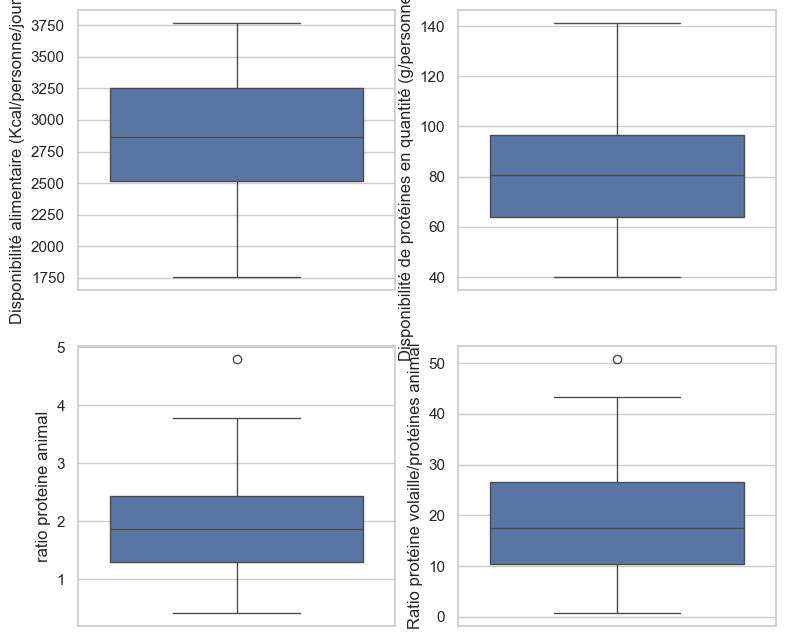

In [221]:
# Afficher des boxplot
plt.figure(figsize=(9, 8))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(data=dff,y='Disponibilité alimentaire (Kcal/personne/jour)_x')
plt.subplot(222)
sns.boxplot(data=dff, y='Disponibilité de protéines en quantité (g/personne/jour)_x')
plt.subplot(223)
sns.boxplot(data=dff, y='ratio proteine animal')
plt.subplot(224)
sns.boxplot(data=dff,y='Ratio protéine volaille/protéines animal')

<Axes: ylabel='rnb_hab'>

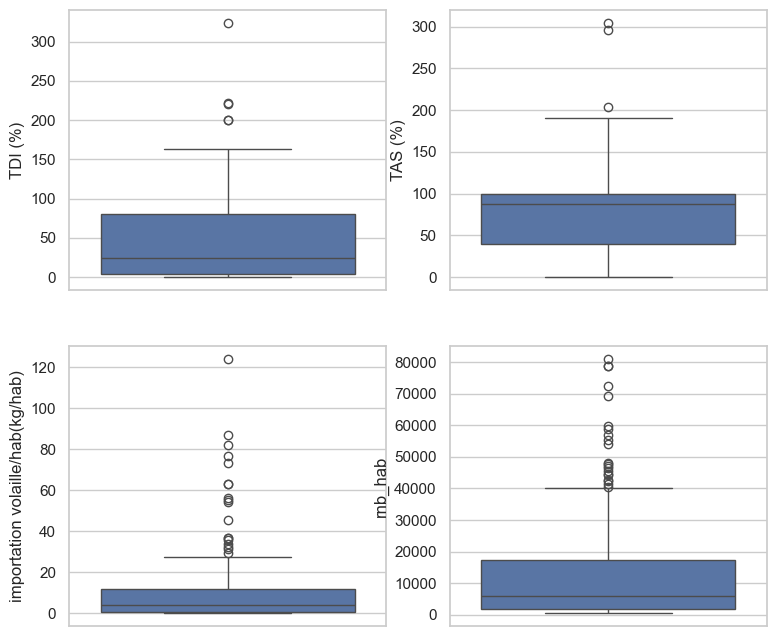

In [223]:
# Afficher des boxplot
plt.figure(figsize=(9, 8))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(data=dff,y='TDI (%)')
plt.subplot(222)
sns.boxplot(data=dff, y='TAS (%)')
plt.subplot(223)
sns.boxplot(data=dff, y='importation volaille/hab(kg/hab)')
plt.subplot(224)
sns.boxplot(data=dff,y='rnb_hab')

In [225]:
dff.sort_values(by = ['TAS (%)'], ascending = False).head()

,Disponibilité alimentaire (Kcal/personne/jour)_x,Disponibilité de protéines en quantité (g/personne/jour)_x,ratio proteine animal,Ratio protéine volaille/protéines animal,TDI (%),TAS (%),importation volaille/hab(kg/hab),rnb_hab
Zone,,,,,,,,
Belgique,3770.0,101.35,2.08,7.90,222.37,304.61,29.597851,44598.085232
Pays-Bas,3251.0,104.43,2.64,12.39,163.44,295.70,35.719852,48092.791505
Pologne,3526.0,103.02,2.21,21.91,4.76,203.37,1.449154,13133.082837
Thaïlande,2826.0,60.94,1.72,16.62,0.23,190.24,0.028898,6125.802338
Hongrie,3289.0,87.76,2.37,19.67,21.80,185.34,5.961054,14033.062099


In [227]:
dff.sort_values(by = ['TDI (%)'], ascending = False).head()


,Disponibilité alimentaire (Kcal/personne/jour)_x,Disponibilité de protéines en quantité (g/personne/jour)_x,ratio proteine animal,Ratio protéine volaille/protéines animal,TDI (%),TAS (%),importation volaille/hab(kg/hab),rnb_hab
Zone,,,,,,,,
Chine - RAS de Hong-Kong,3353.0,137.88,4.80,21.82,323.93,8.57,124.139068,47831.226310
Belgique,3770.0,101.35,2.08,7.90,222.37,304.61,29.597851,44598.085232
Timor-Leste,2142.0,57.69,1.48,9.21,220.00,20.00,8.847721,1803.657571
Gambie,2542.0,63.48,1.75,7.38,200.00,25.00,7.227101,630.440393
Îles Salomon,2410.0,53.64,0.89,9.38,200.00,0.00,9.433384,2100.381090


## Observation

Quelques outliers sont détectés sur le TDI et le TAS. Je décide de les conserver afin de préserver l’intégrité des données.

In [235]:
dff.to_csv('clean_df.csv')


In [237]:
pop_2017.to_csv('pop_2017.csv')
